# Classification Performance
## Loading the data
For this problem we are going to use one of scikit-learn's built-in "toy" datasets - see https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset for details.

Load the digits dataset and access the data and target variables as follows:

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
digX = digits['data']
digy = digits['target']


# Visualise the data
Visualise a few of the numbers. You can either adapt the code in the scikit-learning documention
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits or from the book's hithub page for the chapter https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb The approaches are slightly different. Do you understand why?

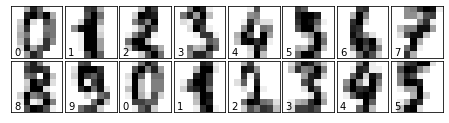

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Build a binary classifier
We are going to build a binary classifier purely for the purposes of exploring the performance measures. We're going to take the same approach as the book here of  initially aiming to identufy one digit - the book choose "5" but obviously you can pick any number. Split your data into a training and a test set, and then prepare your target variable according to which digit you are going to classify.

The only classifier we've looked at in any detail is Logistic Regression, so let's use that! We're going to keep things really simple and just use the default parameters. X and y will obviously need to be modified to the names of your training data:

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

digit_to_classify = 5

digy5 = (digy == digit_to_classify).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digX, digy5, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

This may give you some warnings about failing to converge but don't worry about that - we're not looking to build the perfect classifer at the moment.

You can then make predictions using this by (where X is your test data):

In [4]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

## Evaluating your classifier
Store the results of your predictions and then look at the performance by investigating the confusion matrix https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.99
Precision: 0.94
Recall: 0.96
F1 Score: 0.95
Confusion Matrix:
[[310   3]
 [  2  45]]


Calculate the imports. Are they what you expect from your confusion matrix?

Yes as they are classifying most of the values correctly. This was expected as there is a lot of data and most of the numbers are distinguishable. Only a few are harder to read and can be confused for another number.

## Optional Task
If you have made good progress with this and have plenty of time then try adapting the code from the textbook github page to plot the precision/recall curve.

## Extending our binary classifier to predict multiple classes - One Versus Rest
Logistic Regression can be extended to deal with multiple classes but for now we're going to demonstrate the use of the One versus Rest (OVR) approach which can build a multi-class classifier from a binary one. Import the OneVsRestClassifier as follows and parameterise it to use Logistic Regression:

In [6]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(LogisticRegression())

Then train this with your initial digits training set (with all 10 digits) and examine the performance of the predictor on your test data using the confision matrix.

Why do you think the confusion matrix takes this form?

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digX, digy, test_size=0.2, random_state=42)

ovr_clf = OneVsRestClassifier(LogisticRegression())
ovr_clf.fit(X_train, y_train)

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

OneVsRestClassifier(estimator=LogisticRegression())

In [12]:
y_pred = ovr_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  0  0  1  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  1  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  4 36]]


## Linear regression and Stochastic Gradient Descent
Load the diabetes data https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

Build two linear models:

A Linear Regression model: from sklearn.linear_model import LinearRegression
A Stochastic Gradient Descent regression model: from sklearn.linear_model import SGDRegressor (Take a look at the book for an illustration of how to parameterise this)
Fit both of these to the diabetes data set and compare their performance in terms of their score. Also look at the coefficients and the intercept values and the RMSE.

## Polynomial Features
Create an array of random data and transform this using a 3rd degree polynomial.
Create a 2-D array of random data and transform this using a 2nd degree polynomial.
In both cases inspect the contents of the transformed data to make sure you are clear how the values arise.

If you built model on training data using this approach, what would you need to do to the test data?

## Logistic Regression
We've already used Logistic Regression but now we're going to look at its abilities to perform multiclass classification. The documentation for Logistic Regression is here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Load the iris data https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset and build a Logistic Regression multiclass classifier to predict all three categories of flower. Examine the performance using a confusion matrix.

Finally go back to the digits data set and build a Logistic Regression multiclass classifier. Compare the performance of this against the the OVR classifier that you built earlier. If you look at the Logistic Regression documentation you will see that there are several options for parameterising the multiclass classifier. What impact do these have on the results?